In [177]:
import re
import os
import copy
import matplotlib.pyplot as plt

### Build

In [198]:
command = "gcc -g -std=c++17 -I D:/programs/Cadmium-Simulation-Environment/cadmium/include -I D:/programs/Cadmium-Simulation-Environment/DESTimes/include D:/code/C++/RT-Cadmium-FDD/top_model/main.cpp -o D:/code/C++/RT-Cadmium-FDD/top_model/main"
completed_process = subprocess.run(command, shell=False, capture_output=True, text=True)
print(completed_process.returncode)

1


### Run

In [199]:
command = "D:/code/C++/RT-Cadmium-FDD/top_model/main.exe"
completed_process = subprocess.run(command, shell=False, capture_output=True, text=True)
print(completed_process.stdout)

FileNotFoundError: [WinError 2] The system cannot find the file specified


### Read from file

In [190]:
fileName = "SensorFusion.txt"

with open(fileName, "r") as f:
    lines = f.readlines()
    
faults = {"{1}": "A", "{2}": "B", "{3}": "C", "{4}": "D", "{1, 2}": "AB", "{1, 3}": "AC", "{1, 4}": "AD", "{2, 3}": "BC", "{3, 4}": "CD", }
fault_codes = {}

for key in faults.values():
    fault_codes[key] = 0
    
for line in lines:
    if (re.search("supervisor", line) == None):
        continue
        
    interest = re.findall("\{\d+[,]*\s*\d*\}", line)[0]
    fault_codes[faults[interest]] += 1
    
values = list(fault_codes.values())
keys = list(fault_codes.keys())

### Bar Chat

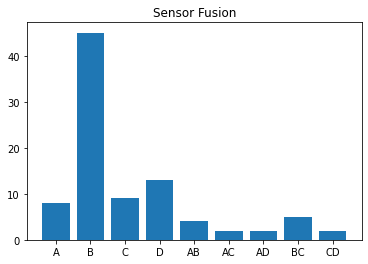

In [191]:
plt.title('Sensor Fusion')
plt.bar(keys, values)
plt.show()

### Doughnut

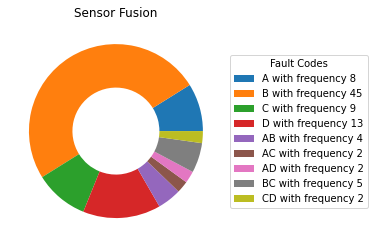

In [192]:
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] += " with frequency " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Sensor Fusion")
plt.show()